# Labeled data full set

In [166]:
import pandas as pd

In [167]:
# import labeled data ( random 1000 posts lebeled by Elvie and  - 100 double checked by me )
aba_posts_labeled1 = pd.read_csv('data/labeled_data/for_elvie_labeled.csv')
aba_posts_labeled1.info()
print()

aba_posts_labeled2 = pd.read_csv('data/labeled_data/for_elvie2_labeled.csv')
aba_posts_labeled2.info()
print()

aba_posts_labeled3 = pd.read_csv('data/labeled_data/for_elvie3_labeled.csv')
aba_posts_labeled3.info()
print()

aba_posts_labeled4 = pd.read_csv('data/labeled_data/for_elvie4_labeled.csv')
aba_posts_labeled4.info()
print()

aba_posts_labeled5 = pd.read_csv('data/labeled_data/for_elvie5_labeled.csv')
aba_posts_labeled5.info()
print()

aba_posts_labeled6 = pd.read_csv('data/labeled_data/for_maria_labeled.csv')
aba_posts_labeled6.info()
print()

aba_posts_labeled7 = pd.read_csv('data/labeled_data/for_andrea_labeled.csv')
aba_posts_labeled7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 4 columns):
 #   Column                                                                                             Non-Null Count  Dtype 
---  ------                                                                                             --------------  ----- 
 0   Document                                                                                           160 non-null    object
 1   Sentiment (poz / neg/ neutral)                                                                     160 non-null    object
 2   Author (can be parent/carer/professions/person with ASD) leave blank if it is not clearly stated)  85 non-null     object
 3   Comments - anything you deem important info                                                        34 non-null     object
dtypes: object(4)
memory usage: 5.1+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4

In [168]:
# join the labeled data ( 1000 random posts )
aba_posts_labeled = pd.concat([aba_posts_labeled1, aba_posts_labeled2, aba_posts_labeled3, aba_posts_labeled4, aba_posts_labeled5, aba_posts_labeled6, aba_posts_labeled7], ignore_index=True)
aba_posts_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 4 columns):
 #   Column                                                                                             Non-Null Count  Dtype 
---  ------                                                                                             --------------  ----- 
 0   Document                                                                                           3560 non-null   object
 1   Sentiment (poz / neg/ neutral)                                                                     3456 non-null   object
 2   Author (can be parent/carer/professions/person with ASD) leave blank if it is not clearly stated)  1339 non-null   object
 3   Comments - anything you deem important info                                                        632 non-null    object
dtypes: object(4)
memory usage: 111.4+ KB


In [169]:
# Rename columns as needed
column_mapping = {
    'Sentiment (poz / neg/ neutral)': 'sentiment',
    'Author (can be parent/carer/professions/person with ASD) leave blank if it is not clearly stated)': 'author',
    'Comments - anything you deem important info': 'commnents'
}

aba_posts_labeled.rename(columns=column_mapping, inplace=True)
aba_posts_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Document   3560 non-null   object
 1   sentiment  3456 non-null   object
 2   author     1339 non-null   object
 3   commnents  632 non-null    object
dtypes: object(4)
memory usage: 111.4+ KB


In [170]:
aba_posts_labeled.head()

,Document,sentiment,author,commnents
0,Is she in ABA therapy I only ask because my hu...,Neutral,NaN,NaN
1,I heard you are able to ask them questions May...,Neutral,NaN,
2,I agree with that Even dr Lovaas said ABA does...,Pozitive,NaN,
3,Thank you so so much for sharing your experien...,Pozitive,Parent,
4,Thank you that makes a lot of sense Seems pret...,Neutral,NaN,NaN


In [171]:
# 104 entries sentiment col missing
# sentiment was not recorded as the posts were not relevant to aba - see comments
# remove these rows
# the bertopic model resulted in almost all posts being relevant to aba - only about 100 out of 3500 posts are not aba related (less than 1%)
aba_posts_labeled[aba_posts_labeled['sentiment'].isnull()]

,Document,sentiment,author,commnents
232,Sounds like this SLP is using outdated practic...,NaN,NaN,Not aba
288,Speech therapist here like many are saying I t...,NaN,NaN,Not aba
365,BT Survey Updates on Burnout and Satisfaction ...,NaN,ABA professional,Survey about professionals suffering burnout
416,If you're not an SLP you're not qualified to e...,NaN,NaN,Not ABA
421,I work with SLPS at my clinic because we are m...,NaN,NaN,Not ABA
...,...,...,...,...
3421,I think Aba interacting with Train would be fu...,NaN,NaN,Not aba
3475,Wow ABA and nazi jokes What a catch s,NaN,NaN,Not aba
3479,I always thought it was ABBA not ABA probs jus...,NaN,NaN,Not aba
3514,I m an SLP and do not condone withholding,NaN,NaN,Not aba


In [172]:
aba_posts_labeled = aba_posts_labeled.dropna(subset=['sentiment'])
aba_posts_labeled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3559
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Document   3456 non-null   object
 1   sentiment  3456 non-null   object
 2   author     1326 non-null   object
 3   commnents  540 non-null    object
dtypes: object(4)
memory usage: 135.0+ KB


In [173]:
# as per instruction given for labling atuhor entry was left blank if the author was not clear in the post
# replace the NaN values in authot with 'layperson' 
aba_posts_labeled['author'].fillna('layperson', inplace=True)
aba_posts_labeled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3559
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Document   3456 non-null   object
 1   sentiment  3456 non-null   object
 2   author     3456 non-null   object
 3   commnents  540 non-null    object
dtypes: object(4)
memory usage: 135.0+ KB


In [174]:
# look at sentiment classes 
# there are some misspelling -> can be corrected
# sentiment is blank space in 4 rows
aba_posts_labeled['sentiment'].value_counts()

sentiment
Neutral              2223
Negative              767
Positive              229
Pozitive              154
Negative               67
                        4
Positive                4
Neutral                 3
Neutral?                2
Negative?               1
Pozitive Negative       1
Ne                      1
Name: count, dtype: int64

In [175]:
empty_sentiment_rows = aba_posts_labeled[aba_posts_labeled['sentiment'].str.isspace()] 
empty_sentiment_rows  # posts not about aba -> drop them

,Document,sentiment,author,commnents
11,Abata Therapeutics Announces First Development...,,layperson,Not aba related
117,OT is amazing We have done speech and OT since...,,Parent,Not aba related
160,I honestly don't know how Aba disagreed with P...,,layperson,Aba N Preach - YouTube channel not relevant
184,Don't do SLPA It's extremely hard to find jobs...,,layperson,Not aba


In [176]:
aba_posts_labeled.drop(empty_sentiment_rows.index, inplace=True)
aba_posts_labeled.info()
# 3452 posts to be inlcuded in the analysis 
# comments columns has missing data - however this col. is only for reference and will be dropped for final analysis

<class 'pandas.core.frame.DataFrame'>
Index: 3452 entries, 0 to 3559
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Document   3452 non-null   object
 1   sentiment  3452 non-null   object
 2   author     3452 non-null   object
 3   commnents  536 non-null    object
dtypes: object(4)
memory usage: 134.8+ KB


In [177]:
# check rows where sentiment contains a ? ( grader was unsure )
question_mark_rows = aba_posts_labeled[aba_posts_labeled['sentiment'].str.contains('\?', na=False, regex=True)]
question_mark_rows

,Document,sentiment,author,commnents
103,This makes a lot of sense Thanks for giving su...,Negative?,ABA professional,Not sure if ABA is right to treat children wit...
147,Accommodating is one thing Installing a ramp f...,Neutral?,Parent,NaN
960,No I m saying he d be pissed about modern ABA ...,Neutral?,layperson,NaN


In [178]:
# if the coders were confused the ML algo. might be as well 
# drop rows where sentiment contains '?'
aba_posts_labeled = aba_posts_labeled[~aba_posts_labeled['sentiment'].str.contains('\?')]
aba_posts_labeled.info()

# 3449 rows / posts remain

<class 'pandas.core.frame.DataFrame'>
Index: 3449 entries, 0 to 3559
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Document   3449 non-null   object
 1   sentiment  3449 non-null   object
 2   author     3449 non-null   object
 3   commnents  535 non-null    object
dtypes: object(4)
memory usage: 134.7+ KB


## Sentiment 
descriptive statistics

In [179]:
aba_posts_labeled['sentiment'].value_counts()  # category labeles need cleaning ( spelling checks and consistency )

sentiment
Neutral              2223
Negative              767
Positive              229
Pozitive              154
Negative               67
Positive                4
Neutral                 3
Pozitive Negative       1
Ne                      1
Name: count, dtype: int64

In [180]:
# drop Ne row - see reasoning in file: sentiment_analysis_aba_posts.ipynb
aba_posts_labeled = aba_posts_labeled[aba_posts_labeled['sentiment'] != 'Ne']
# Replace 'Pozitive Negative' with 'Neutral' in the 'sentiment' column
aba_posts_labeled['sentiment'] = aba_posts_labeled['sentiment'].replace('Pozitive Negative', 'Neutral')
# remove whitespace 
aba_posts_labeled['sentiment'] = aba_posts_labeled['sentiment'].str.strip()

aba_posts_labeled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3448 entries, 0 to 3559
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Document   3448 non-null   object
 1   sentiment  3448 non-null   object
 2   author     3448 non-null   object
 3   commnents  535 non-null    object
dtypes: object(4)
memory usage: 134.7+ KB


In [181]:
aba_posts_labeled['sentiment'].value_counts() 

sentiment
Neutral     2227
Negative     834
Positive     233
Pozitive     154
Name: count, dtype: int64

In [182]:
# make spelling uniform for pozitive sentiment label 
mask = aba_posts_labeled['sentiment'].str.startswith('Po')
aba_posts_labeled.loc[mask, 'sentiment'] = 'Positive'
aba_posts_labeled['sentiment'].value_counts() 

sentiment
Neutral     2227
Negative     834
Positive     387
Name: count, dtype: int64

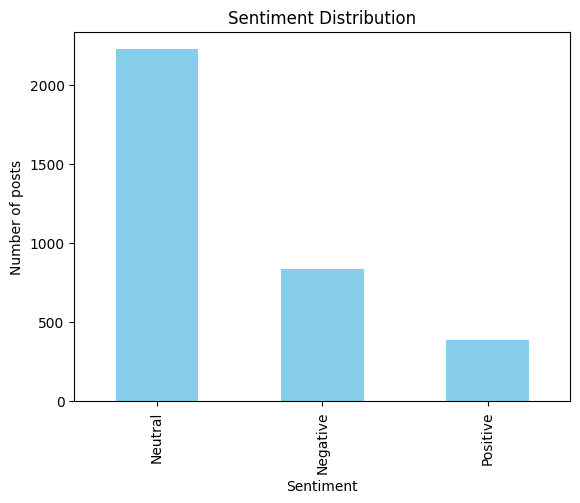

In [183]:
import matplotlib.pyplot as plt

# Plot the 'sentiment' column
sentiment_counts = aba_posts_labeled['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of posts')
plt.show()

# more than half the posts present as neutral regarding aba therapy 
# data is not balanced
# the data distribution is similar to the smaller data set (used in file: sentiment_analysis_aba_posts.ipynb)

# as per instructions and also by inspecting the comments column :
# posts that are neutral are either:
#   - information/advice seeking about aba therapy related
#   - information/advice seeking about aba job related
#   - information/advice seeking about aba in general
#   - people expressing both pozitive and negative opinions about aba in the same post 

# negative sentiments were recorded for those posts that:
#   - expressed only opinions against aba therapy or aba in general
#   - expressed only opinions against aba as a career field/ job related 

# pozitive sentiments were recorded for those posts that:
#   - expressed only pozitive opinions about aba therapy or aba in general
#   - expressed only pozitive opinions about aba as a career field/ job related 

## Post's Author
descriptive statistics

In [184]:
# look at categories of authors
# strip white spaces
aba_posts_labeled['author'] = aba_posts_labeled['author'].str.strip()
# lowewrcase all lables
aba_posts_labeled['author'] = aba_posts_labeled['author'].str.lower()
aba_posts_labeled['author'].value_counts() 

author
layperson                                    2126
aba professional                              564
parent                                        379
other professional                             99
asd                                            72
asd person                                     48
professional                                   32
aba student                                    24
aba professional with asd                      12
aba  professional/asd                           8
aba professional?                               6
family                                          5
slp                                             5
ex aba professional                             4
teacher                                         4
ex aba profesisonal                             4
student                                         4
other professional / asd                        4
parent/asd                                      3
relative                                   

In [185]:
# replace ? containing labels with layperson ( as the grader was not sure , it means it is not clear in the text)
question_mark_rows = aba_posts_labeled[aba_posts_labeled['author'].str.contains('\?', na=False, regex=True)]
aba_posts_labeled.loc[question_mark_rows.index, 'author'] = 'layperson'
aba_posts_labeled['author'].value_counts()

author
layperson                                    2138
aba professional                              564
parent                                        379
other professional                             99
asd                                            72
asd person                                     48
professional                                   32
aba student                                    24
aba professional with asd                      12
aba  professional/asd                           8
slp                                             5
family                                          5
ex aba profesisonal                             4
teacher                                         4
student                                         4
other professional / asd                        4
ex aba professional                             4
relative                                        3
parent/asd                                      3
aba professional / asd                     

In [186]:
# replace other people with layperson 
other_people = ['relativeo of aba professional', 'student', 'aba student', 'person with “special needs” not specified']

other_people_mapping = {person: 'layperson' for person in other_people}
aba_posts_labeled['author'] = aba_posts_labeled['author'].replace(other_people_mapping)

aba_posts_labeled.author.value_counts()

author
layperson                      2168
aba professional                564
parent                          379
other professional               99
asd                              72
asd person                       48
professional                     32
aba professional with asd        12
aba  professional/asd             8
family                            5
slp                               5
ex aba profesisonal               4
other professional / asd          4
ex aba professional               4
teacher                           4
aba professional / asd            3
parent/asd                        3
relative                          3
asd parent                        2
other professional/asd            2
parent/other professional         2
ex - aba professional             2
aba professional/parent           2
aba student with asd              1
ex aba profesional                1
parent with asd                   1
asd student                       1
ot                   

In [187]:
# replace other therapy/education related professions with other_professions
other_professions = ['slp', 'ot', 'salt', 'psychologist', 'teacher', 'education professional', 'professors', 'occupational therapist', 'professional', 'ex aba professional / ot']

profession_mapping = {profession: 'other_professional' for profession in other_professions}

aba_posts_labeled['author'] = aba_posts_labeled['author'].replace(profession_mapping)

aba_posts_labeled.author.value_counts()

author
layperson                      2168
aba professional                564
parent                          379
other professional               99
asd                              72
other_professional               48
asd person                       48
aba professional with asd        12
aba  professional/asd             8
family                            5
other professional / asd          4
ex aba professional               4
ex aba profesisonal               4
aba professional / asd            3
parent/asd                        3
relative                          3
parent/other professional         2
other professional/asd            2
asd parent                        2
aba professional/parent           2
ex - aba professional             2
ex aba profesional                1
aba student with asd              1
clinical therapist with asd       1
parent with asd                   1
asd student                       1
social worker with asd            1
sibling              

In [188]:
# replace other therapy/education related professions with other_professions
family = ['sibling', 'friend of asd person', 'relative']

family_mapping = {member: 'family' for member in family}

aba_posts_labeled['author'] = aba_posts_labeled['author'].replace(family_mapping)

aba_posts_labeled.author.value_counts()

author
layperson                      2168
aba professional                564
parent                          379
other professional               99
asd                              72
asd person                       48
other_professional               48
aba professional with asd        12
family                           10
aba  professional/asd             8
ex aba professional               4
ex aba profesisonal               4
other professional / asd          4
aba professional / asd            3
parent/asd                        3
ex - aba professional             2
aba professional/parent           2
asd parent                        2
parent/other professional         2
other professional/asd            2
aba student with asd              1
social worker with asd            1
ex aba profesional                1
parent with asd                   1
asd student                       1
clinical therapist with asd       1
parent with asd child             1
ot with asd          

In [189]:
# standardize labels for ex aba professional
ex_aba_professional = ['ex aba professional', 'ex - aba professional']

ex_aba_mapping = {member: 'ex aba profesisonal' for member in ex_aba_professional}

aba_posts_labeled['author'] = aba_posts_labeled['author'].replace(ex_aba_mapping)

aba_posts_labeled.author.value_counts()

author
layperson                      2168
aba professional                564
parent                          379
other professional               99
asd                              72
asd person                       48
other_professional               48
aba professional with asd        12
ex aba profesisonal              10
family                           10
aba  professional/asd             8
other professional / asd          4
aba professional / asd            3
parent/asd                        3
aba professional/parent           2
parent/other professional         2
other professional/asd            2
asd parent                        2
aba student with asd              1
social worker with asd            1
ex aba profesional                1
parent with asd                   1
asd student                       1
clinical therapist with asd       1
parent with asd child             1
ot with asd                       1
asd teacher                       1
ot/parent            

In [190]:
# standardize labels for person with “special needs” not specified ( = layperson) and parent
aba_posts_labeled['author'] = aba_posts_labeled['author'].replace('asd student', 'asd person')
aba_posts_labeled['author'] = aba_posts_labeled['author'].replace('parent with asd child', 'parent')
aba_posts_labeled['author'] = aba_posts_labeled['author'].replace('other professional', 'other_professional')
aba_posts_labeled['author'] = aba_posts_labeled['author'].replace('asd person', 'asd')


aba_posts_labeled.author.value_counts()

author
layperson                      2168
aba professional                564
parent                          380
other_professional              147
asd                             121
aba professional with asd        12
ex aba profesisonal              10
family                           10
aba  professional/asd             8
other professional / asd          4
aba professional / asd            3
parent/asd                        3
aba professional/parent           2
asd parent                        2
parent/other professional         2
other professional/asd            2
aba student with asd              1
clinical therapist with asd       1
ex aba profesional                1
parent with asd                   1
social worker with asd            1
ot with asd                       1
asd teacher                       1
ot/parent                         1
psychologist with asd             1
parent/aba professional           1
Name: count, dtype: int64

In [191]:
# replace other therapy/education related professions with other_professions in strings
other_professions = [ 'ot', 'psychologist', 'teacher', 'social worker', 'clinical therapist']
profession_mapping = {profession: 'other_professional' for profession in other_professions}

aba_posts_labeled['author'] = aba_posts_labeled['author'].replace(profession_mapping, regex=True)

aba_posts_labeled.author.value_counts()

author
layperson                                    2168
aba professional                              564
parent                                        380
other_professionalher_professional            147
asd                                           121
aba professional with asd                      12
family                                         10
ex aba profesisonal                            10
aba  professional/asd                           8
other_professional with asd                     4
other_professionalher professional / asd        4
aba professional / asd                          3
parent/asd                                      3
asd parent                                      2
other_professionalher professional/asd          2
parent/other_professionalher professional       2
aba professional/parent                         2
other_professional/parent                       1
asd other_professional                          1
parent with asd                            

In [192]:
aba_posts_labeled['author'] = aba_posts_labeled['author'].replace('other_professionalher_professional', 'other_professional')
aba_posts_labeled['author'] = aba_posts_labeled['author'].replace('other_professionalher_professional', 'other_professional', regex=True)
aba_posts_labeled['author'] = aba_posts_labeled['author'].replace('other_professionalher professional', 'other_professional', regex=True)

aba_posts_labeled.author.value_counts()

author
layperson                      2168
aba professional                564
parent                          380
other_professional              147
asd                             121
aba professional with asd        12
family                           10
ex aba profesisonal              10
aba  professional/asd             8
other_professional with asd       4
other_professional / asd          4
aba professional / asd            3
parent/asd                        3
asd parent                        2
other_professional/asd            2
parent/other_professional         2
aba professional/parent           2
other_professional/parent         1
asd other_professional            1
parent with asd                   1
ex aba profesional                1
aba student with asd              1
parent/aba professional           1
Name: count, dtype: int64

In [193]:
# repalce 'with' with '/'
aba_posts_labeled['author'] = aba_posts_labeled['author'].replace('with', '/', regex=True)
aba_posts_labeled.author.value_counts()

author
layperson                    2168
aba professional              564
parent                        380
other_professional            147
asd                           121
aba professional / asd         15
ex aba profesisonal            10
family                         10
aba  professional/asd           8
other_professional / asd        8
parent/asd                      3
asd parent                      2
aba professional/parent         2
parent/other_professional       2
other_professional/asd          2
asd other_professional          1
aba student / asd               1
ex aba profesional              1
parent / asd                    1
other_professional/parent       1
parent/aba professional         1
Name: count, dtype: int64

In [194]:
aba_posts_labeled['author'] = aba_posts_labeled['author'].replace('asd person', 'asd')
aba_posts_labeled['author'] = aba_posts_labeled['author'].replace('asd parent', 'parent / asd')
aba_posts_labeled['author'] = aba_posts_labeled['author'].replace('asd other_professional', 'asd / other_professional')

aba_posts_labeled.author.value_counts()

author
layperson                    2168
aba professional              564
parent                        380
other_professional            147
asd                           121
aba professional / asd         15
ex aba profesisonal            10
family                         10
other_professional / asd        8
aba  professional/asd           8
parent/asd                      3
parent / asd                    3
other_professional/asd          2
aba professional/parent         2
parent/other_professional       2
asd / other_professional        1
aba student / asd               1
ex aba profesional              1
other_professional/parent       1
parent/aba professional         1
Name: count, dtype: int64

In [195]:
# family - > move to layperson as they are not directly involved in decission making regarding the therapy
aba_posts_labeled['author'] = aba_posts_labeled['author'].replace('family', 'layperson')
# ex aba proffessionals go into other_professionals as they are not currently practicing aba
aba_posts_labeled['author'] = aba_posts_labeled['author'].replace('ex aba profesisonal', 'other_professional')
aba_posts_labeled['author'] = aba_posts_labeled['author'].replace('ex aba profesional', 'other_professional')

aba_posts_labeled['author'] = aba_posts_labeled['author'].replace('aba student / asd', 'asd')

aba_posts_labeled['author'] = aba_posts_labeled['author'].replace('aba  professional/asd', 'aba professional/asd')

aba_posts_labeled.author.value_counts()

author
layperson                    2178
aba professional              564
parent                        380
other_professional            158
asd                           122
aba professional / asd         15
other_professional / asd        8
aba professional/asd            8
parent / asd                    3
parent/asd                      3
other_professional/asd          2
parent/other_professional       2
aba professional/parent         2
other_professional/parent       1
asd / other_professional        1
parent/aba professional         1
Name: count, dtype: int64

In [196]:
# split the 'author' column and convert to lists
aba_posts_labeled['author'] = aba_posts_labeled['author'].str.split('/')
# strip white spaces from each element within the 'author' column
aba_posts_labeled['author'] = aba_posts_labeled['author'].apply(lambda x: [i.strip() for i in x])
aba_posts_labeled.author.value_counts()

author
[layperson]                     2178
[aba professional]               564
[parent]                         380
[other_professional]             158
[asd]                            122
[aba professional, asd]           23
[other_professional, asd]         10
[parent, asd]                      6
[parent, other_professional]       2
[aba professional, parent]         2
[other_professional, parent]       1
[asd, other_professional]          1
[parent, aba professional]         1
Name: count, dtype: int64

In [197]:
# some list have the same entries but reversed orther -> make it uniform
aba_posts_labeled['author'] = aba_posts_labeled['author'].apply(set)
aba_posts_labeled['author'] = aba_posts_labeled['author'].apply(list)
aba_posts_labeled.author.value_counts()

author
[layperson]                     2178
[aba professional]               564
[parent]                         380
[other_professional]             158
[asd]                            122
[asd, aba professional]           23
[asd, other_professional]         11
[asd, parent]                      6
[other_professional, parent]       3
[aba professional, parent]         3
Name: count, dtype: int64

In [199]:
aba_posts_labeled.info()  # 3448 rows/ post to include in sentiment analisys

<class 'pandas.core.frame.DataFrame'>
Index: 3448 entries, 0 to 3559
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Document   3448 non-null   object
 1   sentiment  3448 non-null   object
 2   author     3448 non-null   object
 3   commnents  535 non-null    object
dtypes: object(4)
memory usage: 263.7+ KB


In [200]:
# Count all the labels per category
aba_posts_labeled["author"].explode().value_counts()  

author
layperson             2178
aba professional       590
parent                 392
other_professional     172
asd                    162
Name: count, dtype: int64

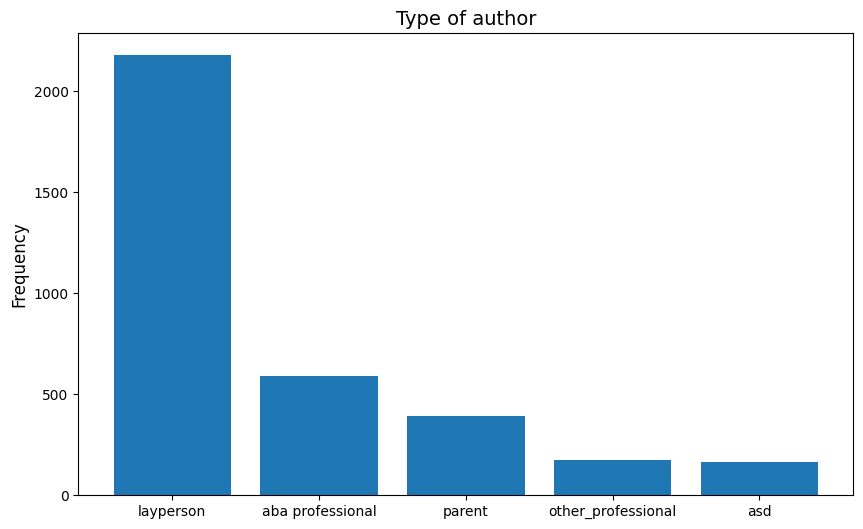

In [201]:
# Get unique items & counts
unique_values = aba_posts_labeled["author"].explode().value_counts().index.tolist()
unique_value_counts = aba_posts_labeled["author"].explode().value_counts().values

# Create plot
fig, ax = plt.subplots(figsize = (10,6))
ax.bar(unique_values, unique_value_counts)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Type of author", size = 14)
plt.show()


# data is not balanced
# more than half the post do not explicitly state they are a professional, a parents/carer or if they have ASD
# more than half the posts come from the general population ( that most likely has not directly experienced ABA, be it as a client or a proveder)

In [202]:
# Create Individual Columns for All Unique Values

def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)


In [203]:
aba_posts_labeled_bool = boolean_df(
  item_lists = aba_posts_labeled["author"],
  unique_items = unique_values
)

In [204]:
aba_posts_labeled_bool.head()

,layperson,aba professional,parent,other_professional,asd
0,True,False,False,False,False
1,True,False,False,False,False
2,True,False,False,False,False
3,False,False,True,False,False
4,True,False,False,False,False


In [205]:
# join 'Document' and 'sentiment' columns from aba_posts_labeled with aba_posts_labeled_bool
aba_posts_labeled_new = pd.concat([aba_posts_labeled[['Document', 'sentiment']], aba_posts_labeled_bool], axis=1)

aba_posts_labeled_new.info()
aba_posts_labeled_new.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3448 entries, 0 to 3559
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Document            3448 non-null   object
 1   sentiment           3448 non-null   object
 2   layperson           3448 non-null   bool  
 3   aba professional    3448 non-null   bool  
 4   parent              3448 non-null   bool  
 5   other_professional  3448 non-null   bool  
 6   asd                 3448 non-null   bool  
dtypes: bool(5), object(2)
memory usage: 226.7+ KB


,Document,sentiment,layperson,aba professional,parent,other_professional,asd
0,Is she in ABA therapy I only ask because my hu...,Neutral,True,False,False,False,False
1,I heard you are able to ask them questions May...,Neutral,True,False,False,False,False
2,I agree with that Even dr Lovaas said ABA does...,Positive,True,False,False,False,False
3,Thank you so so much for sharing your experien...,Positive,False,False,True,False,False
4,Thank you that makes a lot of sense Seems pret...,Neutral,True,False,False,False,False


In [206]:
# save new dataset on google drive - needed to be imported in colab for running transformer models on GPU
aba_posts_labeled_new.to_csv('/Users/andreeanistor/Google Drive/My Drive/MS_DS_NLP_project/aba_posts_labeled_cleaned_full_set.csv', index=False)